In [6]:
from Bio import SeqIO
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
from soft_align import *
import torch

In [7]:
data_dir = "/Users/rsawhney/dev/protein_embed_softalign/data/"

In [70]:
seqs = SeqIO.to_dict(SeqIO.parse(f"{data_dir}93_pol_A_seqs.fasta", "fasta"))
type(seqs)

dict

In [71]:
len(seqs.keys())

93

In [10]:
embeddings_dir = f"{data_dir}/pola_embeddings"

In [60]:
ref_seq_name = 'Escheria_coli_IAI39_POL_ref'

In [62]:
str(seqs['Escheria_coli_IAI39_POL_ref'].seq)[0:100]

'MVQIPQNPLILVDGSSYLYRAYHAFPPLTNSAGEPTGAMYGVLNMLRSLIMQYKPTHAAVVFDAKGKTFRDELFEHYKSHRPPMPDDLRAQIEPLHAMVK'

In [13]:
seq_names = list(seqs.keys())
print(len(seq_names))
print(seq_names[0:5])

93
['Escheria_coli_IAI39_POL_ref', 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I', 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I', 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P', 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P']


In [14]:
# import pdb
# def find_homologous_pos(seq_1_str, seq_1_pos, seq_2_str, seq_1_embedding, seq_2_embedding):
#     pdb.set_trace()
#     data = get_data_matrix(seq_1_embedding, seq_2_embedding)
#     matches = get_matches(seq_1_str, seq_2_str, data)
#     longest_path = get_longest_path(data, matches)
#     longest_path_dict = dict(longest_path)
#     return longest_path_dict.get(seq_1_pos, None)

In [15]:
# homologs = defaultdict(dict)
 # 86
# seq_1_pos = 677 # 62
# seq_1_pos = 571 # (300-800) # X


# def get_homologs_dict(seq1_name, seq1_pos):
#     homologs = defaultdict(dict)
#     sites_per_seq = defaultdict(dict)
#     sites_per_seq = { seq1_name: [seq1_pos]}
#     for idx, seq1_name in enumerate(seq_names):
#         seq1_str = str(seqs[seq1_name].seq)
#         seq1_embedding = torch.load(f"{embeddings_dir}/{seq1_name}.pt")
#         for seq2_name in seq_names[idx+1:]:
#             # print(f"Comparing {seq1_name} and {seq2_name}")
#             for seq2_pos in sites_per_seq(seq1_name)
#                 seq2_str = str(seqs[seq2_name].seq)
#                 seq2_embedding = torch.load(f"{embeddings_dir}/{seq2_name}.pt") 
#                 homologs[f"{seq1_name}_{seq1_pos}"][seq2_name] = find_homologous_pos(seq1_str, seq1_pos, seq2_str, seq1_embedding, seq2_embedding)
#                 if sites_per_seq[seq2_name] is not None:
#             # print("Done")

In [16]:
def get_homologs_dict(seq1_name, seq1_pos, start_idx=1):
    homologs = defaultdict(dict)
    seq1_str = str(seqs[seq1_name].seq)
    seq1_embedding = torch.load(f"{embeddings_dir}/{seq1_name}.pt")
    for seq2_name in seq_names[start_idx:]:
        # print(f"Comparing {seq1_name} and {seq2_name}")
        seq2_str = str(seqs[seq2_name].seq)
        seq2_embedding = torch.load(f"{embeddings_dir}/{seq2_name}.pt")    
        homologs[seq1_name][seq2_name] = find_homologous_pos(seq1_str, seq1_pos, seq2_str, seq1_embedding, seq2_embedding)
        # print("Done")
    return homologs

In [17]:
# seq1_pos = 761 # 86
    # seq1_pos = 677 # 62
    # seq1_pos = 571 # (300-800) # X
    # seq1_name = 'Escheria_coli_IAI39_POL_ref'

seq1_name = 'Escheria_coli_IAI39_POL_ref'
seq1_pos = 761

homologs = get_homologs_dict(seq1_name, seq1_pos)
homologs

defaultdict(dict,
            {'Escheria_coli_IAI39_POL_ref': {'RI_1_NODE_15_length_88571_pol762_L_rnr438_I': 578,
              'RI_8_NODE_36_length_107729_pol762_L_rnr438_I': 582,
              'RI_7_NODE_69_length_56267_pol762_L_rnr438_P': 442,
              'RI_8_NODE_76_length_74904_pol762_L_rnr438_P': 559,
              'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na': 409,
              'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na': 442,
              'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na': 441,
              'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na': 202,
              'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na': 442,
              'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na': 451,
              'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na': 428,
              'RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na': 4

In [18]:
# develop final dictionary using the 3 sites, to update hits and misses for 

In [19]:
homologs
# 1-927

defaultdict(dict,
            {'Escheria_coli_IAI39_POL_ref': {'RI_1_NODE_15_length_88571_pol762_L_rnr438_I': 578,
              'RI_8_NODE_36_length_107729_pol762_L_rnr438_I': 582,
              'RI_7_NODE_69_length_56267_pol762_L_rnr438_P': 442,
              'RI_8_NODE_76_length_74904_pol762_L_rnr438_P': 559,
              'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na': 409,
              'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na': 442,
              'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na': 445,
              'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na': 441,
              'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na': 202,
              'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na': 442,
              'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na': 451,
              'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na': 428,
              'RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na': 4

In [20]:
# not_none_pos = list(k for k in homologs['Escheria_coli_IAI39_POL_ref'].keys() if homologs['Escheria_coli_IAI39_POL_ref'][k]!=None)
# not_none_pos

In [21]:
# len(set(not_none_pos))

In [22]:
none_pos = list(k for k in homologs['Escheria_coli_IAI39_POL_ref'].keys() if homologs['Escheria_coli_IAI39_POL_ref'][k]==None)
none_pos

['RI_2_NODE_51405_length_1730_pol762_F',
 'RI_5_NODE_27622_length_2446_pol762_F',
 'RI_8_NODE_182_length_55288_pol762_F',
 'RI_8_NODE_2060_length_19529_pol762_F',
 'RI_8_NODE_14194_length_6542_pol762_F',
 'RI_8_NODE_54482_length_2278_pol762_Y']

In [23]:
len(none_pos)

6

In [24]:
# {
#     'ecoli_ref_761': {
#         'seq1': none,
#         'seq2': '468',
#         'seq': 'pos',
#         'seq': 'pos',
#     }
#     'seq1_ref_567': {
#         'seq2': '468',
#         'seq': 'pos',
#         'seq': 'pos',
#     },
#     'seq2_ref_468': {
#         'seq1': '567',
#         'seq': 'pos',
#         'seq': 'pos',
#     # },

# }

In [25]:
# {
#     'ecoli_ref': {
#         'pos': 761,
#         'seq1': pos 
#         'seq1': pos 
#         'seq1': pos 
#         'seq1': pos 
#         'seq1': pos 
#     }
# }

'''
Use homologs to build nx graph
1. iterate over homologs and 1) add_node(seq_name, seq_pos)-> return node_id, 2) make_edge(node_id1, node_id2) # where node_id1 is the node for seq1, and node_id2 is the node for seq2
   NOTE: there can be more than 1 nodes for a seq, eg, seq10 can have 5 nodes that are homologous to seq1 ref_node
2. starting from seq1 ref pos, return path along nodes with highest degree
3. parallize/optimize
'''

In [26]:
ref_seq_name = 'Escheria_coli_IAI39_POL_ref'

In [27]:
ref_homologs = homologs[ref_seq_name]
type(ref_homologs)

dict

In [28]:
missed_list = []
def get_homologous_graph_for_ref(ref_seq_name, ref_seq_pos, seq_names, homologs):
    # initialize directed graph
    G = nx.DiGraph()
    # add node for ref_seq_name - append pos to name to allow for multiple position for a single sequence
    # G.add_node(f"{ref_seq_name}_{ref_seq_pos}", name=ref_seq_name, pos=ref_seq_pos)
    # seq_names = [ref_seq_name]
    # seq_names.extend(list(homologs[ref_seq_name].keys()))
    # build homologous dict
    ref_homologs = homologs[ref_seq_name]
    for idx1, seq1_name in enumerate(seq_names):
        seq1_pos = ref_homologs[seq1_name] if seq1_name != ref_seq_name else ref_seq_pos
        # skip processing if pos is None
        if seq1_pos == None:
            missed_list.append(seq1_name)
            continue
        G.add_node(f"{seq1_name}_{seq1_pos}", seq_name=seq1_name, pos=seq1_pos, level=idx1)
        for idx2, seq2_name in enumerate(seq_names[idx1+1:]):
            idx2 = idx1+1 + idx2
            seq2_pos = ref_homologs[seq2_name]
             # skip processing if pos is None
            if seq2_pos == None:
                missed_list.append(seq2_name)
                continue
            # add node
            G.add_node(f"{seq2_name}_{seq2_pos}", seq_name=seq2_name, pos=seq2_pos, level=idx2)
            # add edge from ref_seq to seq
            # print(f"Adding edge between {seq1_name}_{seq1_pos} and {seq2_name}_{seq2_pos}")
            G.add_edge(f"{seq1_name}_{seq1_pos}", f"{seq2_name}_{seq2_pos}")
    return G   

In [29]:
# G.clear()
seq1_name = 'Escheria_coli_IAI39_POL_ref'
seq1_pos = 761

G = get_homologous_graph_for_ref(seq1_name, seq1_pos, seq_names, homologs)
edges = list(G.edges())
print(edges[0:10])
print(len(edges))

# Escheria_coli_IAI39_POL_ref

[('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I_582'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P_442'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P_559'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na_409'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na_442'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na_445'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na_445'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na_441'), ('Escheria_coli_IAI39_POL_ref_761', 'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na_202')]
3741


In [30]:
# list(G.nodes)

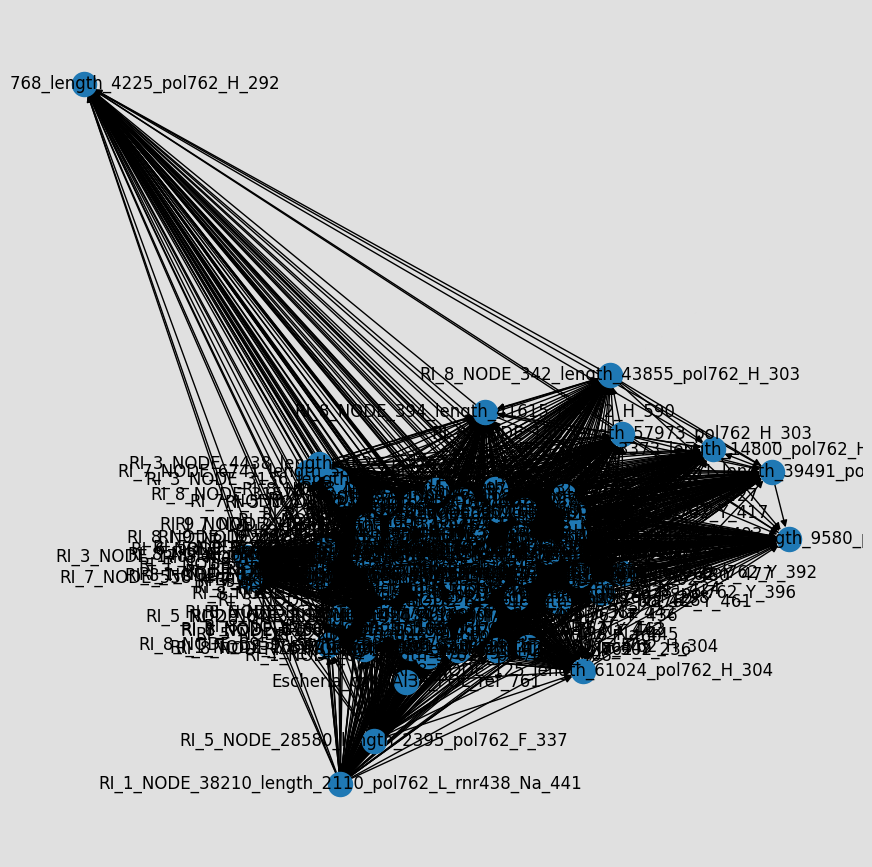

In [31]:
def display_graph(G):
    pos = nx.spring_layout(G) # position the nodes using the spring layout
    plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
    nx.draw_networkx(G)
    plt.axis('off')
    plt.show()

display_graph(G)

In [32]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Escheria_coli_IAI39_POL_ref_761', 86),
 ('RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578', 86),
 ('RI_8_NODE_36_length_107729_pol762_L_rnr438_I_582', 86),
 ('RI_7_NODE_69_length_56267_pol762_L_rnr438_P_442', 86),
 ('RI_8_NODE_76_length_74904_pol762_L_rnr438_P_559', 86),
 ('RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na_409', 86),
 ('RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na_442', 86),
 ('RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na_445', 86),
 ('RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na_445', 86),
 ('RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na_441', 86),
 ('RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na_202', 86),
 ('RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na_442', 86),
 ('RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na_451', 86),
 ('RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na_428', 86),
 ('RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na_401', 86),
 ('RI_5_NODE_22231_length_2797_pol762_L_rnr438_Na_445', 86),
 ('RI_6_NODE_4881_length_6792_pol762_L_rnr438_Na_442',

In [33]:
G.number_of_nodes()

87

In [34]:
len(list(set(missed_list)))

6

In [35]:
set(missed_list)

{'RI_2_NODE_51405_length_1730_pol762_F',
 'RI_5_NODE_27622_length_2446_pol762_F',
 'RI_8_NODE_14194_length_6542_pol762_F',
 'RI_8_NODE_182_length_55288_pol762_F',
 'RI_8_NODE_2060_length_19529_pol762_F',
 'RI_8_NODE_54482_length_2278_pol762_Y'}

In [36]:
print(homologs['Escheria_coli_IAI39_POL_ref']['RI_2_NODE_51405_length_1730_pol762_F'])

None


1. Using Graph G created with ecoli 761, iterate over graph G
2. for all nodes starting with nname in seq_names[idx]  - repeat for all 93 seqs
    - get name from seq_names[idx]
    - get pos from node attr or name end
    - get homologs dicts
    - update G using homologs dict




In [37]:
# list(G.nodes(data=True))
list(G.nodes(data=True))

[('Escheria_coli_IAI39_POL_ref_761',
  {'seq_name': 'Escheria_coli_IAI39_POL_ref', 'pos': 761, 'level': 0}),
 ('RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578',
  {'seq_name': 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I',
   'pos': 578,
   'level': 1}),
 ('RI_8_NODE_36_length_107729_pol762_L_rnr438_I_582',
  {'seq_name': 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I',
   'pos': 582,
   'level': 2}),
 ('RI_7_NODE_69_length_56267_pol762_L_rnr438_P_442',
  {'seq_name': 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P',
   'pos': 442,
   'level': 3}),
 ('RI_8_NODE_76_length_74904_pol762_L_rnr438_P_559',
  {'seq_name': 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P',
   'pos': 559,
   'level': 4}),
 ('RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na_409',
  {'seq_name': 'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na',
   'pos': 409,
   'level': 5}),
 ('RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na_442',
  {'seq_name': 'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na',
   'pos': 442,
   'level': 

In [38]:
# G.add_node("RI_1_NODE_15_length_88571_pol762_L_rnr438_I_test", seq_name='RI_1_NODE_15_length_88571_pol762_L_rnr438_I', pos='test', level='test')

In [39]:
# G.remove_node("RI_1_NODE_15_length_88571_pol762_L_rnr438_I_test")

In [40]:
# seq_nodes = [ {'node': x, **y} for x,y in G.nodes(data=True) if 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I' in y['name']]
# seq_nodes

In [41]:
# test_string = "RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578"
# print(test_string.split('_')[-1]) # myname

In [42]:
# G.has_node('RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578')

In [43]:
# seq_nodes_positions = [seq.split('_')[-1] for ]

In [44]:
all_seq_homologs = []
all_seq_homologs.append(homologs)
all_seq_homologs

[defaultdict(dict,
             {'Escheria_coli_IAI39_POL_ref': {'RI_1_NODE_15_length_88571_pol762_L_rnr438_I': 578,
               'RI_8_NODE_36_length_107729_pol762_L_rnr438_I': 582,
               'RI_7_NODE_69_length_56267_pol762_L_rnr438_P': 442,
               'RI_8_NODE_76_length_74904_pol762_L_rnr438_P': 559,
               'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na': 409,
               'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na': 442,
               'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na': 445,
               'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na': 445,
               'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na': 441,
               'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na': 202,
               'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na': 442,
               'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na': 451,
               'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na': 428,
               'RI_5_NODE_17172_length_3280_pol762_

In [45]:
# seq_names[0:5]

In [46]:
# idx = 1
# seq_names[idx:5]

In [47]:
def update_homologous_graph(G, seq_names):    
    for seq1_name in seq_names[1:]:
        '''
        find nodes that contain seq_name
        node format:
        [{  'node_name': 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578',
            'seq_name': 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I',
            'pos': 578,
            'level': 1}]
        '''
        nodes_w_seq1_name = [{'node_name': node_name, **attr} for node_name, attr in G.nodes(data=True) if attr['seq_name']==seq1_name]
        for node in nodes_w_seq1_name:
            print('node info:', node)
            homologs = get_homologs_dict(seq1_name, node["pos"], node["level"]+1)
            all_seq_homologs.append(homologs)
            seq1_homologs = homologs[seq1_name]
            # iterate over nodes after seq1 in seq_names - level gives index in seq_names
            for seq2_idx, seq2_name in enumerate(seq_names[node["level"]+1:]):
                # print('seq2_name:', seq2_name)
                seq2_idx = node["level"]+1 + seq2_idx
                # print('seq2_idx:', seq2_idx)
                seq2_pos = seq1_homologs[seq2_name]
                # print('seq2_pos:', seq2_pos)
                # skip processing if pos is None
                if seq2_pos == None:
                    missed_list.append(seq2_name)
                    continue
                # add node
                if not G.has_node(f"{seq2_name}_{seq2_pos}"):
                    G.add_node(f"{seq2_name}_{seq2_pos}", seq_name=seq2_name, pos=seq2_pos, level=seq2_idx)
                # add edge from seq1_seq to seq
                # print(f"Adding edge between {seq1_name}_{seq1_pos} and {seq2_name}_{seq2_pos}")
                G.add_edge(f"{seq1_name}_{node['pos']}", f"{seq2_name}_{seq2_pos}")
    return G

In [48]:
G = update_homologous_graph(G, seq_names)

node info: {'node_name': 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I_578', 'seq_name': 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I', 'pos': 578, 'level': 1}


node info: {'node_name': 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I_582', 'seq_name': 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I', 'pos': 582, 'level': 2}
node info: {'node_name': 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P_442', 'seq_name': 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P', 'pos': 442, 'level': 3}
node info: {'node_name': 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P_559', 'seq_name': 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P', 'pos': 559, 'level': 4}
node info: {'node_name': 'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na_409', 'seq_name': 'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na', 'pos': 409, 'level': 5}
node info: {'node_name': 'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na_442', 'seq_name': 'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na', 'pos': 442, 'level': 6}
node info: {'node_name': 'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na_445', 'seq_name': 'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na', 'pos': 445, 'level': 7}
node info: {'node_name': '

In [49]:
len(all_seq_homologs)

182

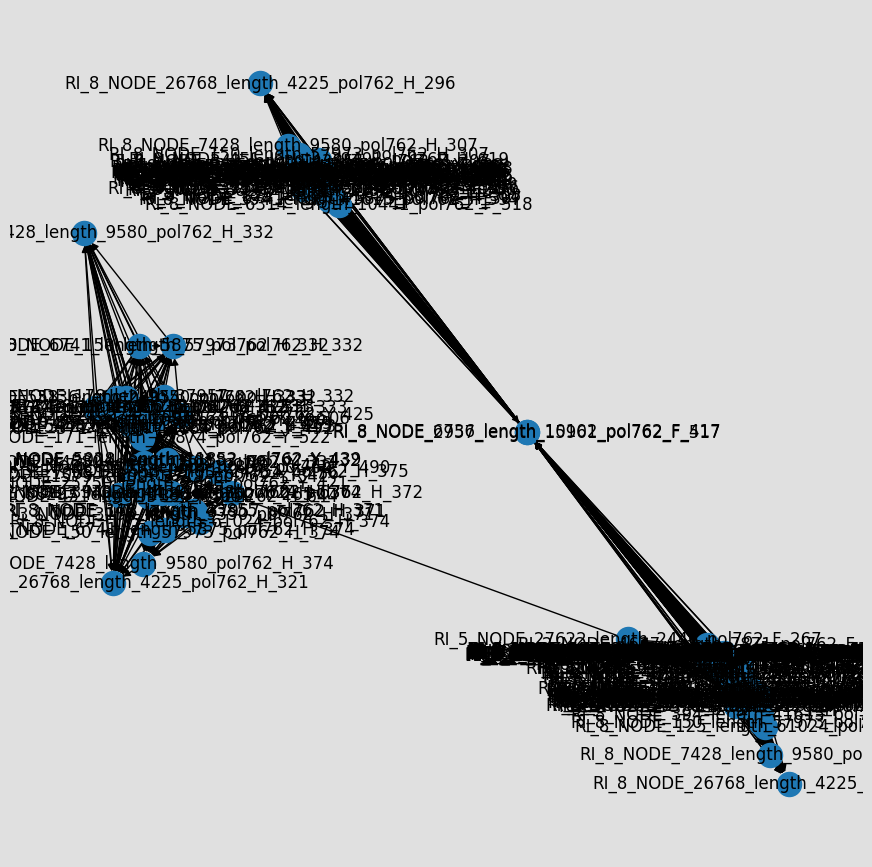

In [50]:
display_graph(G)

In [51]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('RI_8_NODE_2957_length_15961_pol762_F_517', 131),
 ('RI_8_NODE_6736_length_10102_pol762_F_417', 131),
 ('RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na_428', 94),
 ('RI_2_NODE_1077_length_18433_pol762_F_508', 94),
 ('RI_2_NODE_4617_length_7871_pol762_F_510', 94),
 ('RI_2_NODE_59411_length_1576_pol762_F_216', 94),
 ('RI_4_NODE_33046_length_2135_pol762_F_460', 94),
 ('RI_5_NODE_28580_length_2395_pol762_F_337', 94),
 ('RI_6_NODE_829_length_19189_pol762_F_529', 94),
 ('RI_7_NODE_16161_length_3434_pol762_F_262', 94),
 ('RI_7_NODE_24616_length_2660_pol762_F_224', 94),
 ('RI_8_NODE_2499_length_17595_pol762_F_484', 94),
 ('RI_8_NODE_6314_length_10441_pol762_F_514', 94),
 ('RI_8_NODE_8310_length_8980_pol762_F_501', 94),
 ('RI_9_NODE_687_length_22603_pol762_F_510', 94),
 ('RI_9_NODE_20852_length_2966_pol762_F_298', 94),
 ('RI_5_NODE_123_length_43779_pol762_Y_446', 94),
 ('RI_5_NODE_64831_length_1454_pol762_Y_211', 94),
 ('RI_7_NODE_37270_length_2058_pol762_Y_238', 94),
 ('RI_8_NODE_171_length_

In [53]:
import pickle

# save graph pickle
pickle.dump(G, open('homologous_graph.pickle', 'wb'))

# load graph object from file
# G = pickle.load(open('homologous_graph.pickle', 'rb'))

In [57]:
pickle.dump(all_seq_homologs, open("all_seq_homologs.pickle", "wb"))

In [ ]:
# dct_read = pickle.load(open("all_seq_homologs.pickle", "rb"))

In [73]:
[x.id for k, x in seqs.items()]

['Escheria_coli_IAI39_POL_ref',
 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I',
 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I',
 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P',
 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P',
 'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na',
 'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na',
 'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na',
 'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na',
 'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na',
 'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na',
 'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na',
 'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na',
 'RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na',
 'RI_5_NODE_17172_length_3280_pol762_L_rnr438_Na',
 'RI_5_NODE_22231_length_2797_pol762_L_rnr438_Na',
 'RI_6_NODE_4881_length_6792_pol762_L_rnr438_Na',
 'RI_7_NODE_6171_length_6187_pol762_L_rnr438_Na',
 'RI_8_NODE_291_length_46820_pol762_L_rnr438_Na',
 'RI_8_NODE_1778_length_21288_pol762_L_rnr438_Na',
 'RI_8_NODE_2

In [98]:
seq1_name = 'Escheria_coli_IAI39_POL_ref'
seq1_str = str(seqs[seq1_name].seq)
seq1_embedding = torch.load(f"{embeddings_dir}/{seq1_name}.pt")
seq2_name = 'RI_8_NODE_342_length_43855_pol762_H'
seq2_str = str(seqs[seq2_name].seq)
seq2_embedding = torch.load(f"{embeddings_dir}/{seq2_name}.pt")    
h_test = find_homologous_pos(seq1_str, seq1_pos, seq2_str, seq1_embedding, seq2_embedding)
print(h_test)

303


In [ ]:
find_homologous_pos(seq1_str, seq1_pos, seq2_str, seq1_embedding, seq2_embedding)

In [80]:
from collections import defaultdict  
post_counts = defaultdict(int)
matches = []
for d in all_seq_homologs:
    try:
        pos = d[list(d.keys())[0]]['RI_8_NODE_342_length_43855_pol762_H']
        post_counts[pos] +=1
    except:
        print (f"not connection with{list(d.keys())[0]}")



not connection withRI_8_NODE_342_length_43855_pol762_H
not connection withRI_8_NODE_342_length_43855_pol762_H
not connection withRI_8_NODE_342_length_43855_pol762_H
not connection withRI_8_NODE_342_length_43855_pol762_H
not connection withRI_8_NODE_394_length_41615_pol762_H
not connection withRI_8_NODE_394_length_41615_pol762_H
not connection withRI_8_NODE_394_length_41615_pol762_H
not connection withRI_8_NODE_451_length_39491_pol762_H
not connection withRI_8_NODE_451_length_39491_pol762_H
not connection withRI_8_NODE_451_length_39491_pol762_H
not connection withRI_8_NODE_3373_length_14800_pol762_H
not connection withRI_8_NODE_3373_length_14800_pol762_H
not connection withRI_8_NODE_3373_length_14800_pol762_H
not connection withRI_8_NODE_7428_length_9580_pol762_H
not connection withRI_8_NODE_7428_length_9580_pol762_H
not connection withRI_8_NODE_7428_length_9580_pol762_H
not connection withRI_8_NODE_7428_length_9580_pol762_H
not connection withRI_8_NODE_26768_length_4225_pol762_H
not co

In [81]:
post_counts

defaultdict(int, {303: 80, None: 23, 307: 39, 371: 9, 332: 11})

In [88]:
all_matches = {list(d.keys())[0]: list(d.values())[0]  for  d in  all_seq_homologs}

In [96]:
all_match = {}
seq_match= defaultdict(int)
for i in all_matches.keys():
    seq_match= defaultdict(int)
    for j in all_matches.keys():
        try:
            pos = all_matches[j][i]
        except:
            pass
        seq_match[pos] +=1 
    print(f"postitions for seq {i} are:\n")
    all_match[i] = seq_match

postitions for seq Escheria_coli_IAI39_POL_ref are:

postitions for seq RI_1_NODE_15_length_88571_pol762_L_rnr438_I are:

postitions for seq RI_8_NODE_36_length_107729_pol762_L_rnr438_I are:

postitions for seq RI_7_NODE_69_length_56267_pol762_L_rnr438_P are:

postitions for seq RI_8_NODE_76_length_74904_pol762_L_rnr438_P are:

postitions for seq RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na are:

postitions for seq RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na are:

postitions for seq RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na are:

postitions for seq RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na are:

postitions for seq RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na are:

postitions for seq RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na are:

postitions for seq RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na are:

postitions for seq RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na are:

postitions for seq RI_3_NODE_1013_length_18274_pol762_L_rnr438_Na are:

postitions for seq RI_

In [97]:
all_match

{'Escheria_coli_IAI39_POL_ref': defaultdict(int, {321: 93}),
 'RI_1_NODE_15_length_88571_pol762_L_rnr438_I': defaultdict(int, {578: 93}),
 'RI_8_NODE_36_length_107729_pol762_L_rnr438_I': defaultdict(int, {582: 93}),
 'RI_7_NODE_69_length_56267_pol762_L_rnr438_P': defaultdict(int, {442: 93}),
 'RI_8_NODE_76_length_74904_pol762_L_rnr438_P': defaultdict(int, {559: 93}),
 'RI_1_NODE_1070_length_18682_pol762_L_rnr438_Na': defaultdict(int, {409: 93}),
 'RI_1_NODE_1463_length_15583_pol762_L_rnr438_Na': defaultdict(int, {442: 93}),
 'RI_1_NODE_2638_length_10869_pol762_L_rnr438_Na': defaultdict(int, {445: 93}),
 'RI_1_NODE_16567_length_3591_pol762_L_rnr438_Na': defaultdict(int, {445: 93}),
 'RI_1_NODE_38210_length_2110_pol762_L_rnr438_Na': defaultdict(int, {441: 93}),
 'RI_1_NODE_81373_length_1293_pol762_L_rnr438_Na': defaultdict(int, {202: 93}),
 'RI_2_NODE_11719_length_4423_pol762_L_rnr438_Na': defaultdict(int, {442: 93}),
 'RI_2_NODE_27612_length_2569_pol762_L_rnr438_Na': defaultdict(int, {4

In [99]:
test = {**all_seq_homologs}

TypeError: 'list' object is not a mapping